#Imports

In [ ]:
# Installs
!pip install wget
!pip install --upgrade ydata-profiling
!pip install --upgrade typing_extensions

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=b3d683d1aade3c5792bc769a02b4aba240fd0920c735234768d8138b2718ed23
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.6/357.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size

In [ ]:
# Imports

# General
import wget
import zipfile
import pickle
import pandas as pd
import numpy as np
import warnings

# Data
from ydata_profiling import ProfileReport

# Graphing
import matplotlib.pyplot as plt
import seaborn as sns

# Pipeline and model selection
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, train_test_split, KFold

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind

# Models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor

# Hyperparameter Tunning
from sklearn.model_selection import GridSearchCV

In [ ]:
# Notebook-wide parameters
# Plot parameters
plt.rcParams["figure.figsize"] = [10,6]
sns.set(style="whitegrid", context="talk", palette="pastel")

# Random state parameter to use where necessary for reproducible results
random_state = 420

#Load and init data

In [ ]:
data_url = "https://drive.google.com/uc?id=1QsvR8ZZ7wHiiHoWFSK_LY9HESv_ZJ2rJ"
data_file = "data.zip"
wget.download(data_url, out=data_file)

'data.zip'

In [ ]:
# Unzip the file
with zipfile.ZipFile(data_file, 'r') as zip_ref:
    zip_ref.extractall("data_folder")

In [ ]:
X, X_ivs, y, col_names = pickle.load(open("data_folder/drd2_data.pickle", "rb"))

In [ ]:
df_X = pd.DataFrame(X)
df_X.columns = col_names
df_X_final_test = pd.DataFrame(X_ivs)
df_X_final_test.columns = col_names
y = pd.Series(y)

In [ ]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7337 entries, 0 to 7336
Columns: 2132 entries, D00 to FP2088
dtypes: float64(2132)
memory usage: 119.3 MB


In [ ]:
df_X

,D00,D01,D02,D03,D04,D05,D06,D07,D08,D09,...,FP2079,FP2080,FP2081,FP2082,FP2083,FP2084,FP2085,FP2086,FP2087,FP2088
0,541.280138,541.656,10.0,1.0,8.0,1.0,10.0,40.0,75.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,426.197714,426.582,5.0,1.0,9.0,1.0,4.0,30.0,60.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,348.183778,348.446,4.0,0.0,3.0,0.0,3.0,26.0,50.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1455.763803,1456.831,27.0,19.0,23.0,17.0,16.0,105.0,206.0,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,387.151368,387.886,4.0,0.0,4.0,0.0,4.0,27.0,50.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7332,467.149047,467.513,6.0,0.0,6.0,0.0,5.0,32.0,56.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7333,240.162649,240.350,2.0,0.0,3.0,0.0,2.0,18.0,38.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7334,510.317874,510.802,4.0,0.0,10.0,0.0,4.0,37.0,79.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7335,393.187483,393.556,4.0,2.0,5.0,1.0,5.0,28.0,55.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Exploratory data analysis (EDA)

##Understanding the data

In [ ]:
df_X["FP2081"].info()
df_X["FP2081"].describe()

<class 'pandas.core.series.Series'>
RangeIndex: 7337 entries, 0 to 7336
Series name: FP2081
Non-Null Count  Dtype  
--------------  -----  
7337 non-null   float64
dtypes: float64(1)
memory usage: 57.4 KB


count    7337.000000
mean        0.031075
std         0.173533
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: FP2081, dtype: float64

In [ ]:
# Check y distribution
y.describe()

count    7337.000000
mean        0.388388
std         0.276656
min         0.000000
25%         0.169187
50%         0.382177
75%         0.581929
max         1.000000
dtype: float64

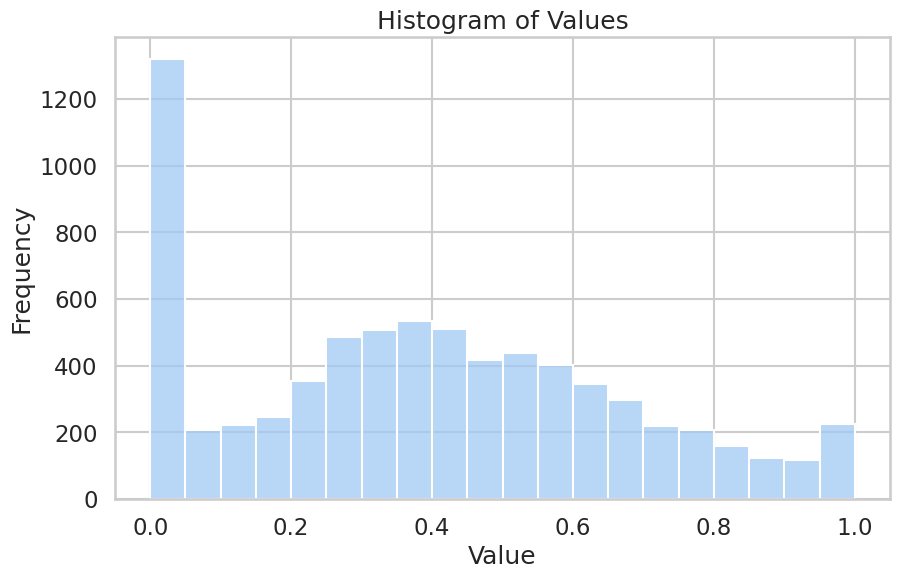

In [ ]:
# Histogram of y
sns.histplot(y, bins=20, kde=False)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values')

plt.show()

In [ ]:
len(y.loc[y==0])

1207

Data is somewhat balanced except that it has a high percentage with value 0.

In [ ]:
pd.set_option("display.max_columns", None)
df_X.describe()

D00          D01          D02          D03          D04  \
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000   
mean    430.518010   431.037078     5.430285     1.206897     6.527327   
std     181.613020   181.757699     4.160569     2.527815     5.983082   
min     135.068414   135.166000     1.000000     0.000000     0.000000   
25%     357.124405   357.429000     4.000000     0.000000     4.000000   
50%     419.107040   419.500000     5.000000     1.000000     6.000000   
75%     472.228141   472.888000     6.000000     1.000000     8.000000   
max    3768.848446  3771.262000    92.000000    47.000000   137.000000   

               D05          D06          D07          D08          D09  \
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000   
mean      1.128799     4.678070    30.497615    59.165190     6.594930   
std       2.218665     2.789156    12.882724    25.749585     4.403703   
min       0.000000     0.000000    10.000000    19.000000     1.000000   
25%       0.000000     3.000000    25.000000    49.000000     5.000000   
50%       1.000000     4.000000    30.000000    57.000000     6.000000   
75%       1.000000     6.000000    33.000000    65.000000     8.000000   
max      42.000000    58.000000   266.000000   527.000000    93.000000   

               D10          D11          D12          D13          D14  \
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000   
mean      0.610740     0.412880     4.157285     2.570806     1.586479   
std       1.362184     0.132115     1.199923     1.018602     0.867549   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.333333     4.000000     2.000000     1.000000   
50%       0.000000     0.400000     4.000000     3.000000     1.000000   
75%       1.000000     0.480000     5.000000     3.000000     2.000000   
max      30.000000     1.000000    14.000000     9.000000    11.000000   

               D15          D16          D17          D18          D19  \
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000   
mean      1.052746     2.006678     0.746899     0.868202     1.259779   
std       0.783258     0.974223     0.814518     0.594819     0.683070   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     1.000000     0.000000     1.000000     1.000000   
50%       1.000000     2.000000     1.000000     1.000000     1.000000   
75%       1.000000     3.000000     1.000000     1.000000     2.000000   
max      11.000000     9.000000     4.000000     7.000000     7.000000   

               D20          D21          D22          D23          D24  \
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000   
mean      0.034074     0.048249     0.682704     0.249421   182.840951   
std       0.181431     0.357754     1.587992     0.615764    74.961926   
min       0.000000     0.000000     0.000000     0.000000    59.499552   
25%       0.000000     0.000000     0.000000     0.000000   152.940004   
50%       0.000000     0.000000     0.000000     0.000000   178.194506   
75%       0.000000     0.000000     1.000000     0.000000   198.927877   
max       1.000000     8.000000    29.000000    10.000000  1542.223628   

               D25          D26          D27          D28          D29  \
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000   
mean     58.256788     4.093037   120.864912    18.221373    11.270109   
std      62.670539     1.400085    48.037139     7.427662     4.561994   
min       3.240000   -10.523160    40.300500     5.593478     3.306776   
25%      35.580000     3.273420   101.437500    15.166474     9.256720   
50%      50.800000     4.074700   117.723700    17.737779    10.962982   
75%      67.350000     4.836300   131.143700    19.856444    12.356276   
max    1365.490000    16.768600   957.020500   150.889493    89.019955   

             

In [ ]:
pd.reset_option("display.max_columns")

Insights:
- First 43 columns are simple chemicals descriptors of the molecules
- The next 2089 are BINARY data (0, 1): Chemical fingerprints values 0 or 1 (means that the molecule is in the position of that variable - hence  been encoded as the variable if 1).
- 43 + 2089 = 2132 columns
- For the prediction - A question is, do we really need to select all the data or could we use only one or the other?
- Feature scaling is definetely necessary! --> Some of the features have a large range looking at the Min Max in describe output. But because only first 43 columns are continuous and others are binary only apply scaling on continuous values. Of course applying on binary values is also possible but could make the interpretation of the transformed data in connection to its domain harder.

In [ ]:
pd.set_option("display.max_columns", None)
df_X_final_test.iloc[:,:44]

,D00,D01,D02,D03,D04,D05,D06,D07,D08,D09,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,D40,D41,D42,FP0000
0,337.192090,337.895,4.0,1.0,7.0,1.0,3.0,23.0,51.0,5.0,1.0,0.611111,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,144.339195,35.58,3.01440,97.1867,14.980174,8.944113,4.540768,4.540768,2.883697,14.224246,8.566148,4.288791,4.288791,2.757708,-1.260000,18.084068,9.137368,6.035153,7.184382,0.0
1,357.176250,357.519,3.0,1.0,5.0,1.0,4.0,25.0,52.0,4.0,0.0,0.523810,4.0,2.0,2.0,0.0,3.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,153.799174,32.70,4.85050,102.7658,15.993676,10.251673,6.894825,6.894825,5.523082,15.177179,9.435177,5.635406,5.635406,4.263237,-1.520000,16.922119,7.004784,3.176743,4.741431,0.0
2,571.227155,572.171,7.0,1.0,7.0,1.0,6.0,39.0,77.0,9.0,1.0,0.466667,5.0,3.0,2.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,237.271748,92.51,5.25482,155.1530,24.321481,15.515078,9.176955,9.176955,6.411523,22.688487,13.623667,8.066717,8.066717,5.739953,-2.680000,29.306247,12.662017,7.497455,9.514774,0.0
3,486.306640,486.776,3.0,1.0,10.0,1.0,2.0,35.0,77.0,4.0,1.0,0.451613,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,213.578394,32.34,6.93530,152.1532,23.070276,16.754463,7.295373,7.295373,5.021532,22.070276,13.254463,6.420373,6.420373,4.485975,-2.613117,26.982359,13.468838,9.163616,10.383457,0.0
4,463.247107,463.578,7.0,2.0,9.0,2.0,5.0,34.0,67.0,7.0,1.0,0.444444,5.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,199.923761,75.82,4.30120,131.6429,19.717670,12.338406,6.602585,6.602585,4.875188,19.717670,12.338406,6.602585,6.602585,4.875188,-3.030000,22.746963,10.488745,4.905676,7.017268,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,483.184418,484.471,4.0,0.0,8.0,0.0,3.0,33.0,64.0,6.0,1.0,0.370370,5.0,3.0,2.0,1.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,207.070245,26.79,6.25780,141.4455,20.453098,12.148659,7.071165,7.071165,5.167584,18.880672,11.770694,6.819189,6.819189,5.041596,-2.270000,23.873698,10.771676,5.133959,7.792720,0.0
812,421.247775,421.545,7.0,1.0,9.0,1.0,6.0,31.0,62.0,7.0,1.0,0.416667,4.0,3.0,1.0,1.0,3.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,183.147888,62.11,3.06520,123.0232,18.165464,11.069501,5.905933,5.905933,4.147216,18.165464,11.069501,5.905933,5.905933,4.147216,-3.060000,21.182683,10.305776,5.168393,7.042064,0.0
813,578.213381,578.764,9.0,0.0,7.0,0.0,9.0,40.0,74.0,11.0,0.0,0.413793,6.0,4.0,2.0,0.0,4.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,239.158527,93.45,4.08012,159.7928,24.762929,16.487545,9.980093,9.980093,7.345123,23.129936,13.653634,7.693651,7.693651,5.604278,-3.150000,27.041133,11.022603,5.418007,7.451592,0.0
814,311.188529,311.425,3.0,0.0,2.0,0.0,3.0,23.0,48.0,3.0,0.0,0.400000,3.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,138.389127,21.70,3.32500,93.6990,14.263346,8.200678,4.730797,4.730797,3.273919,14.263346,8.200678,4.730797,4.730797,3.273919,-2.000000,15.879017,7.050781,3.504597,4.867803,0.0


In [ ]:
pd.reset_option("display.max_columns")

##Checking for missing values

In [ ]:
X_missing_values = df_X.isnull().sum()
X_missing_values.loc[X_missing_values!=0]

Series([], dtype: int64)

In [ ]:
X_ivs_missing_values = df_X_final_test.isnull().sum()
X_ivs_missing_values.loc[X_ivs_missing_values!=0]

Series([], dtype: int64)

As the resulting Series are empty we can say that the data doesn't contain empty cells.

##Analyzing for negative values

Manualy screening the data we can see that two features also contain negative values. We investigate this further and also check if this is the case for the final testing set X_ivs:

In [ ]:
X_negative_values_d26 = df_X[df_X['D26'] < 0]['D26']
X_negative_values_d38 = df_X[df_X['D38'] < 0]['D38']
X_negative_values_d26.value_counts().sum(), X_negative_values_d38.value_counts().sum()

(22, 7335)

Having no domain knowledge we assume that this should be a normal data thing in the molecular data collection.


In [ ]:
X_ivs_negative_values_d26 = df_X_final_test[df_X_final_test['D26'] < 0]['D26']
X_ivs_negative_values_d38 = df_X_final_test[df_X_final_test['D38'] < 0]['D38']
X_ivs_negative_values_d26.value_counts().sum(), X_ivs_negative_values_d38.value_counts().sum()

(0, 816)

Checking in the final testing set for negative values we can interestingly see that all entries for D38 contain only negative values, which aligns with what we saw in the training set. On the other hand for the feature D26 there are no negative entries. This is an interesting observation but doesn't affect our process further. If we would have more domain knowledge someone could have a deeper look into the meaning of D26 and maybe if it cant take negative values the 22 observations in the training set could be identified as wrong measurements and handled accordingly.

##Checking for duplicates

In [ ]:
X_duplicates = df_X.duplicated()
X_duplicates.sum()

321

In [ ]:
duplicated_rows = df_X[X_duplicates]
duplicated_rows

,D00,D01,D02,D03,D04,D05,D06,D07,D08,D09,...,FP2079,FP2080,FP2081,FP2082,FP2083,FP2084,FP2085,FP2086,FP2087,FP2088
467,442.294391,442.604,7.0,1.0,7.0,1.0,6.0,32.0,70.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
789,455.133734,455.605,6.0,1.0,7.0,1.0,6.0,31.0,56.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
863,407.237291,407.533,4.0,2.0,5.0,1.0,4.0,30.0,60.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
884,517.261042,517.692,8.0,1.0,9.0,1.0,7.0,36.0,75.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
921,361.240565,361.529,2.0,1.0,0.0,1.0,2.0,27.0,58.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7259,517.261042,517.692,8.0,1.0,9.0,1.0,7.0,36.0,75.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7283,437.220223,437.536,6.0,4.0,12.0,4.0,6.0,32.0,63.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7308,309.147727,309.369,5.0,3.0,4.0,3.0,4.0,23.0,42.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7331,482.235162,482.650,7.0,1.0,7.0,1.0,6.0,34.0,68.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# duplicated rows and how many times they appear

# Suppress PerformanceWarning
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=pd.errors.PerformanceWarning)
    duplicate_counts = df_X.groupby(df_X.columns.tolist(), as_index=False).size()
    duplicates = duplicate_counts[duplicate_counts['size'] > 1]

display(duplicates)

,D00,D01,D02,D03,D04,D05,D06,D07,D08,D09,...,FP2080,FP2081,FP2082,FP2083,FP2084,FP2085,FP2086,FP2087,FP2088,size
92,219.162314,219.328,2.0,1.0,4.0,1.0,2.0,16.0,37.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
98,221.189198,221.348,3.0,0.0,5.0,0.0,3.0,16.0,39.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
115,229.146664,229.323,2.0,1.0,2.0,1.0,2.0,17.0,36.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3
116,229.146664,229.323,2.0,1.0,2.0,1.0,2.0,17.0,36.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
117,229.146664,229.323,2.0,1.0,2.0,1.0,2.0,17.0,36.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,606.368225,606.815,8.0,0.0,12.0,0.0,8.0,45.0,91.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6863,698.430825,698.956,8.0,0.0,20.0,0.0,8.0,52.0,106.0,8.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6869,713.255957,713.856,9.0,4.0,8.0,5.0,8.0,52.0,91.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6965,1471.758718,1472.830,28.0,19.0,23.0,17.0,16.0,106.0,207.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2


In the training, set we discover that almost 300 entries are duplicates. If we would have more domain knowledge it could be looked deeper into it to decide what to do. But because we have only very limited knowledge about the data we decide to leave the data as untouched as possible, as we cant argue the reason for these duplicates with certainty.

In [ ]:
# check for duplicate rows in test data (df_X_final_test)

X_final_test_duplicates = df_X_final_test.duplicated()
print(X_final_test_duplicates.sum())

duplicated_rows = df_X_final_test[X_final_test_duplicates]
display(duplicated_rows)

# duplicated rows and how many times they appear
with warnings.catch_warnings():
  warnings.simplefilter("ignore", category=pd.errors.PerformanceWarning)
  duplicate_counts = df_X_final_test.groupby(df_X_final_test.columns.tolist(), as_index=False).size()
  duplicates = duplicate_counts[duplicate_counts['size'] > 1]

display(duplicates)

4


,D00,D01,D02,D03,D04,D05,D06,D07,D08,D09,...,FP2079,FP2080,FP2081,FP2082,FP2083,FP2084,FP2085,FP2086,FP2087,FP2088
327,495.171594,495.546,6.0,0.0,7.0,0.0,7.0,34.0,59.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
516,387.171355,387.911,5.0,2.0,7.0,2.0,4.0,27.0,53.0,6.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
593,327.183444,327.424,4.0,1.0,7.0,1.0,4.0,24.0,49.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
766,396.184921,396.462,5.0,2.0,9.0,2.0,4.0,29.0,54.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,D00,D01,D02,D03,D04,D05,D06,D07,D08,D09,...,FP2080,FP2081,FP2082,FP2083,FP2084,FP2085,FP2086,FP2087,FP2088,size
138,327.183444,327.424,4.0,1.0,7.0,1.0,4.0,24.0,49.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
304,387.171355,387.911,5.0,2.0,7.0,2.0,4.0,27.0,53.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
326,396.184921,396.462,5.0,2.0,9.0,2.0,4.0,29.0,54.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
694,495.171594,495.546,6.0,0.0,7.0,0.0,7.0,34.0,59.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


##Checking data type

In [ ]:
df_X.dtypes.loc[df_X.dtypes=="float64"].value_counts()

float64    2132
dtype: int64

All columns are of type float64

##Data Profiling

Pandas profiling can't deal with the high number of binary features we have. So we only do a report on the continuous data.

In [ ]:
# continuous_report = ProfileReport(df_X[cont_features], title="Pandas Profiling Report for continuous features", explorative=True, minimal=True)
# continuous_report.to_notebook_iframe()

In [ ]:
# continuous_report.to_file("continuous_features_report.html")

Insights gathered from ProfileReport of continuous features:
  * some features have a lot of distinct/ unique values (especially the last columns) => but a lot of them also have only a few distinct values (some with < 40, and some with < 350). This is very intersting taking into account that we have over 7000 rows.
  * D26 and D38 contain also negative values
  * most of the features have a "low" value range (10-30) with some "outliers"/few cases totally further away
  * D20 only takes values between 0 and 1
  * seems to follow some kind of distribution => outliers dont dominate and most of the values in one column are "close together"

  TODO: we should also take the X_ivs and compare its distinct values with the distinct values of X_train and see if they match.

#Data preparation

##Split data

In [ ]:
# Do train-test split for further use
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=0.2, random_state=random_state)

In [ ]:
# Reset the index of the DataFrame
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [ ]:
# Define function to split features into continuous and binary so that we can call it at later stages
def split_features(df):
  cont_features = [col for col in df.columns if 'D' in col]
  binary_features = [col for col in df.columns if 'FP' in col]

  return cont_features, binary_features

cont_features, binary_features = split_features(df_X)

In [ ]:
# Use only continuous features
X_train_cont = X_train[cont_features]
X_test_cont = X_test[cont_features]
# Use only binary features
X_train_binary = X_train[binary_features]
X_test_binary = X_test[binary_features]

##Feature importance
We now set-up a pipeline to easily check feature importance on different models to see whether the findings on feature importance are robust to different model types.
1. From above we know that we have no highly correlated features for the continuous features.

First, we test whether the binary features are even necessary and or if they do not add performance. Also, we concat them into one "vector" feature to increase model performance.

In [ ]:
# Set-up preprocessor for feature scaling for continuous features(only min-max for now)
preprocessor = ColumnTransformer(
    transformers=[
        ('cont_scaler', StandardScaler(), cont_features),
        ('binary_pass', 'passthrough', binary_features)
    ]
)

In [ ]:
# Set-up a pipeline for testing feature importance
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', DecisionTreeRegressor())
    ]
)

# Set-up param-grid for different models
param_grid = {
    'regressor': [DecisionTreeRegressor(random_state=random_state), SVR(), LinearRegression()]
}

# Set-up grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

In [ ]:
# Use all features

# Fit
grid_search.fit(X_train, y_train)

# Extract the results into a DataFrame
df_results = pd.DataFrame(grid_search.cv_results_)

# Select and rename columns of interest
columns_of_interest = ['param_regressor', 'mean_test_score', 'std_test_score', 'rank_test_score']
df_results = df_results[columns_of_interest]
df_results = df_results.rename(columns={
    'param_regressor': 'Model',
    'mean_test_score': 'Mean Test Score',
    'std_test_score': 'Standard Deviation',
    'rank_test_score': 'Rank'
})

# Convert model objects to string names for readability
df_results['Model'] = df_results['Model'].apply(lambda x: type(x).__name__)

display(df_results)

,Model,Mean Test Score,Standard Deviation,Rank
0,DecisionTreeRegressor,-0.059630,0.002308,3
1,SVR,-0.027167,0.000747,1
2,LinearRegression,-0.054005,0.002142,2


In [ ]:
# Use only continuous features

# Set-up preprocessor for feature scaling for continuous features(only min-max for now)
preprocessor = ColumnTransformer(
    transformers=[
        ('cont_scaler', StandardScaler(), cont_features)
    ]
)

# Set-up a pipeline for testing feature importance
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', DecisionTreeRegressor())
    ]
)

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit
grid_search.fit(X_train_cont, y_train)

# Extract the results into a DataFrame
df_results = pd.DataFrame(grid_search.cv_results_)

# Select and rename columns of interest
columns_of_interest = ['param_regressor', 'mean_test_score', 'std_test_score', 'rank_test_score']
df_results = df_results[columns_of_interest]
df_results = df_results.rename(columns={
    'param_regressor': 'Model',
    'mean_test_score': 'Mean Test Score',
    'std_test_score': 'Standard Deviation',
    'rank_test_score': 'Rank'
})

# Convert model objects to string names for readability
df_results['Model'] = df_results['Model'].apply(lambda x: type(x).__name__)

display(df_results)

,Model,Mean Test Score,Standard Deviation,Rank
0,DecisionTreeRegressor,-0.079602,0.005326,3
1,SVR,-0.049454,0.001602,1
2,LinearRegression,-0.064972,0.002675,2


In [ ]:
# Use only binary features

# Set-up a pipeline for testing feature importance
pipeline = Pipeline(
    steps=[
        ('regressor', DecisionTreeRegressor())
    ]
)

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit
grid_search.fit(X_train_binary, y_train)

# Extract the results into a DataFrame
df_results = pd.DataFrame(grid_search.cv_results_)

# Select and rename columns of interest
columns_of_interest = ['param_regressor', 'mean_test_score', 'std_test_score', 'rank_test_score']
df_results = df_results[columns_of_interest]
df_results = df_results.rename(columns={
    'param_regressor': 'Model',
    'mean_test_score': 'Mean Test Score',
    'std_test_score': 'Standard Deviation',
    'rank_test_score': 'Rank'
})

# Convert model objects to string names for readability
df_results['Model'] = df_results['Model'].apply(lambda x: type(x).__name__)

display(df_results)

,Model,Mean Test Score,Standard Deviation,Rank
0,DecisionTreeRegressor,-0.052869,0.002531,2
1,SVR,-0.028119,0.001088,1
2,LinearRegression,-0.053224,0.002265,3


Comparing the model performance with different features reveals that simply using only the continuous features is not an option. The results for using only binary features reveal that the models either perform almost identical to the combined features or slightly better. Therefore, it might be possible to use only the binary features. However, we will check feature importance to confirm or refuse this.

We have used both a standard scaler and a min max scaler for the continuous features in this test. The results were similar, leading to above conclusions.

In [ ]:
# Set-up preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cont_scaler', StandardScaler(), cont_features),
        ('binary_pass', 'passthrough', binary_features)
    ]
)

# Set-up a pipeline for testing feature importance
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', DecisionTreeRegressor())
    ]
)

# Feature importance in a decision tree
pipeline.fit(X_train, y_train)
feature_importances = pipeline.named_steps['regressor'].feature_importances_

importances = list(zip(X_train.columns, feature_importances))
importances.sort(key=lambda x: x[1], reverse=True)

for feature, importance in importances[:20]:
    print(f"{feature}: {importance}")

FP1011: 0.08999697569511937
D37: 0.060851905708355206
FP1879: 0.030755616122089532
D11: 0.02445022073221896
D38: 0.021291847540296595
FP1242: 0.021159540026587813
FP1666: 0.020475496775729754
D26: 0.01838652810113843
FP1878: 0.016916340021837284
D25: 0.016193691022365706
FP0916: 0.014986053832162638
D32: 0.013954228972502446
D22: 0.01371755503860928
FP0810: 0.013107424360938815
FP1555: 0.011054940528623203
D41: 0.008712469176475475
FP1045: 0.007975439304134632
D40: 0.00793528658066006
FP1644: 0.007775847246240363
FP0401: 0.00717459179206073


This shows that we cannot simply split the dataset into continuous and binary. But it also shows that feature importance drops relatively quickly, suggesting that we should definitely not work with the entire dataset without reducing dimensionality. Therefore, we now perform dimensionality reduction.

**OLD**: Our approach incorporates the following:
1. Use PCA on continuous data
2. Use MCA on binary data
3. Combine the two datasets to run a model

CURRENT: After applying PCA to the continuous features and trying to implement MCA we found it too hard to implemented MCA for the binary data. Therefore we decided to only apply PCA on continuous features and use different methods to do feature selection and importance for the binary columns.

##Apply Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

final_scaler = StandardScaler()
X_train_cont_scaled = pd.DataFrame(final_scaler.fit_transform(X_train_cont), columns=cont_features)
X_test_cont_scaled = pd.DataFrame(final_scaler.fit_transform(X_test_cont), columns=cont_features)

##Apply PCA

In [ ]:
from sklearn.decomposition import PCA

final_cont_pca = PCA()
final_cont_pca.fit(X_train_cont_scaled)

PCA()

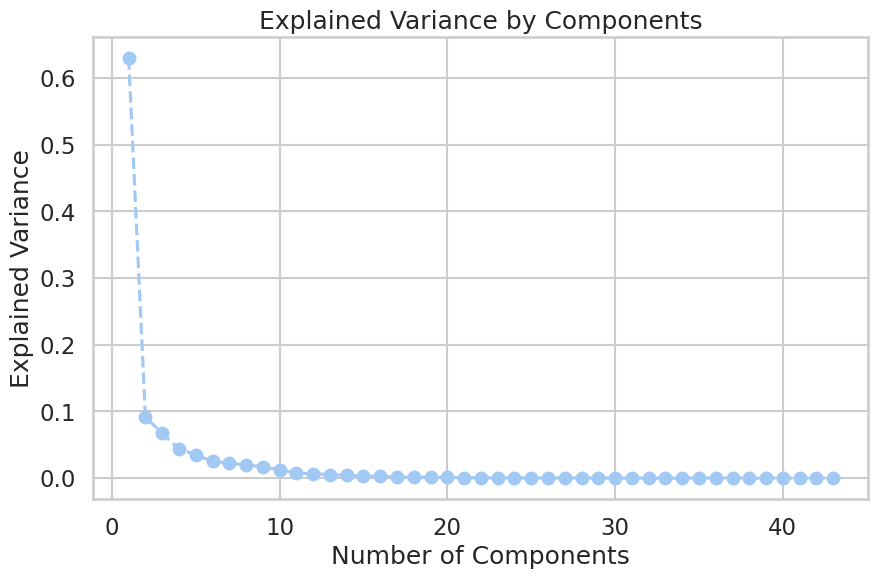

In [ ]:
import matplotlib.pyplot as plt

cont_explained_variance = final_cont_pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cont_explained_variance) + 1), cont_explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()

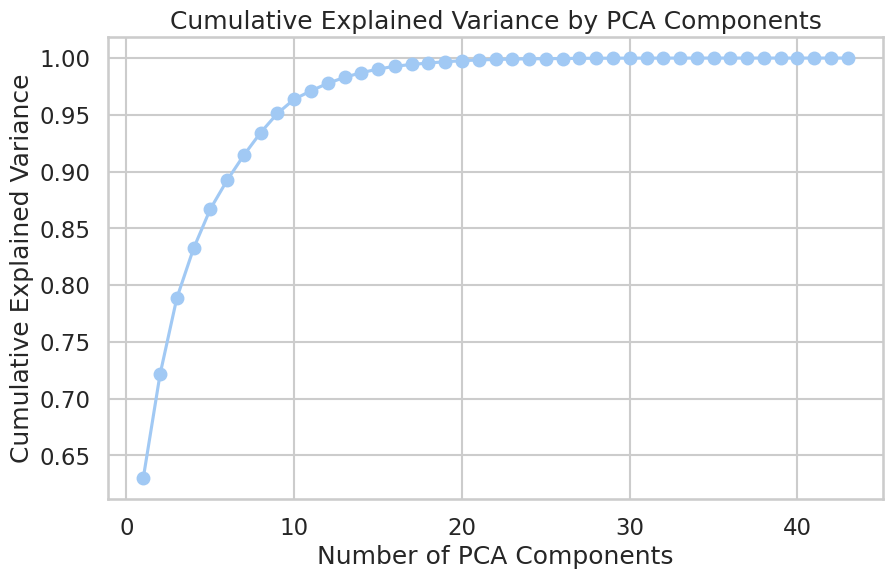

In [ ]:
cumulative_explained_variance = np.cumsum(cont_explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
final_cont_pca = PCA(n_components=2)
X_cont_train_pca = final_cont_pca.fit_transform(X_train_cont_scaled)
X_cont_test_pca = final_cont_pca.transform(X_test_cont_scaled)
# rename columns to PC1, PC2, etc.
X_cont_train_pca = pd.DataFrame(X_cont_train_pca)
X_cont_test_pca = pd.DataFrame(X_cont_test_pca)

X_cont_train_pca.columns = ['PC' + str(i) for i in range(1, final_cont_pca.n_components_ + 1)]
X_cont_test_pca.columns = ['PC' + str(i) for i in range(1, final_cont_pca.n_components_ + 1)]

X_cont_train_pca.head()

,PC1,PC2
0,1.121082,0.835628
1,1.617451,-2.896147
2,-2.536159,0.006050
3,0.186970,0.231336
4,-0.735517,1.126781


As we saw when using all features, with applying scaling on continuous features, for training a DecisionTree we get a MSE of 0.057. But combining the PCs from the continuous data with the untouched binary data and then training a model gives a better results for the mean squared error as this gives 0.053. This strengthens our approach to look at the continuous and binary features separately, apply PCA where found needed and in the end merge the received Principals Components/ features together to train the models.

## Binary features

There are essentialy two methods (broader categories) for feature selection:
1. Wrapper - essentially tests different subsets of features to arrive at the best subset (example: RFE from sklearn library)
2. Filter - use statistical techniques to evaluate the relationship between each feature and the target variables (the correlation approach below would be a filter)

(3). Some models intrinsically select features (e.g. random forests)


Another type of method is dimensionality reduction, it's not strictly feature selection but it reduces the number of input features by using e.g. PCA.

![Image](image1.png)

Concerning feature selection:
With 2089 binary features, checking the correlations between all of them would involve calculating ${2089 \choose 2} = 2,180,916$ combinations. This is not feasible. The number of combinations is also the reason why a wrapper method such as RFE without previously removing some features is not a reasonable approach.
Therefore, we first remove some of the binary features that have an extremely low correlation with the target variable and then proceed.

In [ ]:
df_X_binary = df_X[binary_features]

In [ ]:
# check if any of the columns in the binary dataframe are exactly the same

# transpose df
transposed_df = df_X_binary.T

# Find duplicated columns
duplicated_columns = transposed_df.duplicated()

# Display the names of duplicated columns
duplicated_column_names = df_X_binary.columns[duplicated_columns]
print(duplicated_column_names)

Index([], dtype='object')


There are no exact duplicate columns.

In [ ]:
# to a two-sample t-test for each binary feature with y to see whether the mean of y between 0 and 1 differs significantly and put the difference as well as the p-value in a dataframe

# Create an empty list to store the DataFrames
dataframes = []

# Loop through each binary feature
for feature in binary_features:
    y_0 = y.loc[df_X_binary[feature] == 0]
    y_1 = y.loc[df_X_binary[feature] == 1]
    ttest_result = ttest_ind(y_0, y_1, equal_var=False)

    # Create a DataFrame for this feature and add it to the list
    df_feature = pd.DataFrame([{
        "Feature": feature,
        "Mean y for 0": y_0.mean(),
        "Mean y for 1": y_1.mean(),
        "Difference": y_1.mean() - y_0.mean(),
        "p-value": ttest_result[1]
    }])
    dataframes.append(df_feature)

# Concatenate all DataFrames in the list
binary_ttest = pd.concat(dataframes, ignore_index=True)

# creat absolute difference and sort by it
binary_ttest["Absolute difference"] = binary_ttest["Difference"].abs()
binary_ttest.sort_values(by="Absolute difference", ascending=False, inplace=True)

# Display the resulting DataFrame
display(binary_ttest)

,Feature,Mean y for 0,Mean y for 1,Difference,p-value,Absolute difference
1242,FP1242,0.378277,0.677418,0.299141,1.450381e-40,0.299141
1496,FP1496,0.380847,0.656115,0.275268,1.803654e-30,0.275268
843,FP0843,0.375862,0.643020,0.267158,2.128980e-48,0.267158
632,FP0632,0.381993,0.627654,0.245661,2.245994e-26,0.245661
1879,FP1879,0.380442,0.619381,0.238939,6.175879e-32,0.238939
...,...,...,...,...,...,...
2069,FP2069,0.388390,0.388216,-0.000174,9.942991e-01,0.000174
1875,FP1875,0.388375,0.388492,0.000117,9.911589e-01,0.000117
254,FP0254,0.388389,0.388338,-0.000051,9.980332e-01,0.000051
1523,FP1523,0.388388,0.388424,0.000036,9.990814e-01,0.000036


In [ ]:
# select only those features that have a p-value of less than 0.01
binary_features_selected = binary_ttest.loc[binary_ttest["p-value"] < 0.01].Feature.tolist()
print(f"There are {len(binary_features_selected)} binary features with a p-value of less than 0.01.")

There are 986 binary features with a p-value of less than 0.01.


We decide on a threshold and remove those values that show no significant difference in a two sample ttest. This approach is more robust than using a correlation coefficient which is made to relate two continuous variables. A t-test check for whether there is a difference in the mean of a continuous variable (y here) between two groups (our feature here). If there is no significant difference, we think it is save to assume that the feature is irrelevant and we can drop it.

This actually keeps the test set performance almost constant while increasing the train error which is precisely what we would like to see in our challenge to reduce overfitting.

##Combine datasets

In [ ]:
X_train_binary_selected = X_train[binary_features_selected]
X_test_binary_selected = X_test[binary_features_selected]

In [ ]:
X_train_combined = pd.concat([pd.DataFrame(X_cont_train_pca), X_train_binary_selected], axis=1)
X_test_combined = pd.concat([pd.DataFrame(X_cont_test_pca), X_test_binary_selected], axis=1)

## Check feature importance of PCA cont and binary features in random forest

In [ ]:
# column names of training and testing datasets to strings
X_train_combined.columns = X_train_combined.columns.astype(str)
X_test_combined.columns = X_test_combined.columns.astype(str)

In [ ]:
# set up random forest regressor
rfr = RandomForestRegressor(random_state=random_state, n_estimators=50)

# fit the model
rfr.fit(X_train_combined, y_train)

RandomForestRegressor(n_estimators=50, random_state=420)

In [ ]:
feat_list = []

total_importance = 0
# Print the name and gini importance of each feature
for feature in zip(X_train_combined.columns, rfr.feature_importances_):
    feat_list.append(feature)
    total_importance += feature[1]

included_feats = []
# Print the name and gini importance of each feature
for feature in zip(X_train_combined.columns, rfr.feature_importances_):
    if feature[1] > .05:
        included_feats.append(feature[0])

print('\n',"Cumulative Importance =", total_importance)

# create DataFrame using data
df_imp = pd.DataFrame(feat_list, columns =['FEATURE', 'IMPORTANCE']).sort_values(by='IMPORTANCE', ascending=False)
df_imp['CUMSUM'] = df_imp['IMPORTANCE'].cumsum()
df_imp


 Cumulative Importance = 1.0000000000000004


,FEATURE,IMPORTANCE,CUMSUM
32,FP1011,0.090420,0.090420
0,PC1,0.069406,0.159825
1,PC2,0.045731,0.205556
2,FP1242,0.016213,0.221770
115,FP1878,0.014443,0.236213
...,...,...,...
807,FP0533,0.000026,0.999917
101,FP0096,0.000025,0.999943
560,FP1758,0.000020,0.999963
17,FP0583,0.000020,0.999982


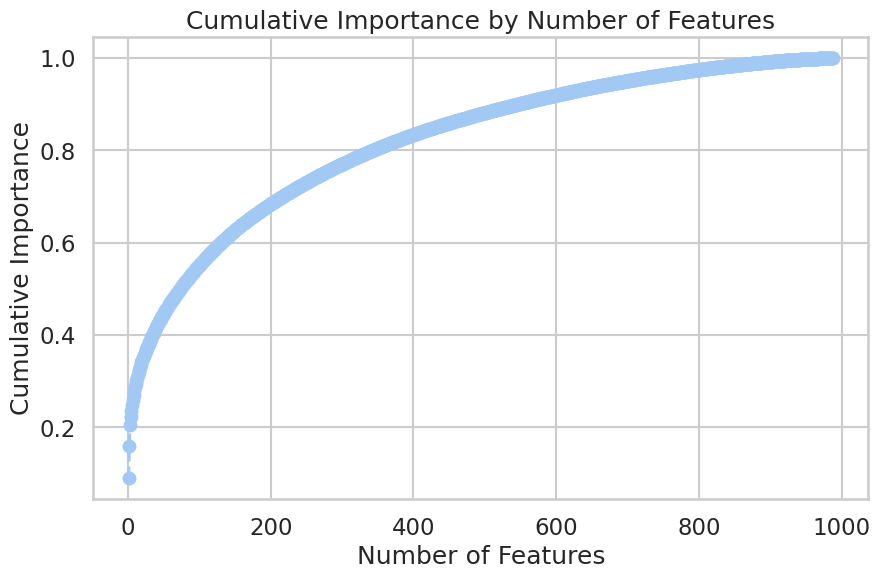

In [ ]:
# plot cumulative importance by number of features
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(df_imp) + 1), df_imp['CUMSUM'], marker='o', linestyle='--')
plt.title('Cumulative Importance by Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.grid(True)
plt.show()

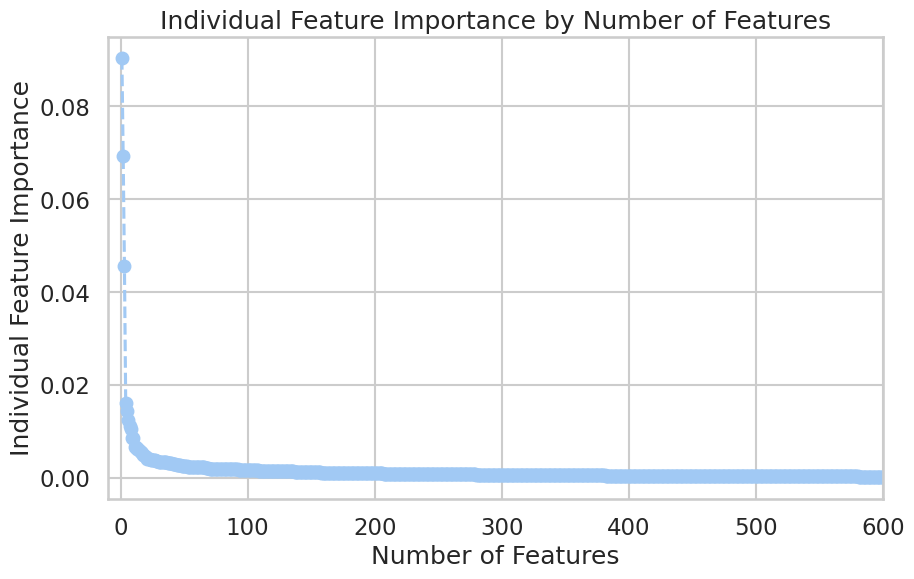

In [ ]:
# plot individual feature importance by number of features
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(df_imp) + 1), df_imp['IMPORTANCE'], marker='o', linestyle='--')
plt.title('Individual Feature Importance by Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Individual Feature Importance')
plt.xlim(-10, 600)
plt.grid(True)
plt.show()

Individual feature importance values are really low in our case.

In [ ]:
# features that together explain 80% of the importance
selected_features = df_imp.loc[df_imp['CUMSUM'] <= 0.8].FEATURE.tolist()
print(f"There are {len(selected_features)} features that add up to 80% importance.")

There are 342 features that add up to 80% importance.


In [ ]:
selected_features

['FP1011',
 'PC1',
 'PC2',
 'FP1242',
 'FP1878',
 'FP0916',
 'FP1104',
 'FP0518',
 'FP1555',
 'FP0810',
 'FP1411',
 'FP0843',
 'FP1666',
 'FP0401',
 'FP1133',
 'FP1879',
 'FP0031',
 'FP1624',
 'FP0143',
 'FP0636',
 'FP0451',
 'FP1456',
 'FP0293',
 'FP1044',
 'FP0970',
 'FP1397',
 'FP0637',
 'FP1873',
 'FP1020',
 'FP0305',
 'FP0310',
 'FP0846',
 'FP0881',
 'FP1772',
 'FP0053',
 'FP1295',
 'FP1124',
 'FP0203',
 'FP0652',
 'FP0896',
 'FP1484',
 'FP1798',
 'FP1532',
 'FP0244',
 'FP1735',
 'FP0939',
 'FP1032',
 'FP0122',
 'FP0508',
 'FP0836',
 'FP1317',
 'FP0503',
 'FP1354',
 'FP0334',
 'FP0873',
 'FP1891',
 'FP0470',
 'FP1949',
 'FP1919',
 'FP1644',
 'FP1118',
 'FP0828',
 'FP1240',
 'FP0674',
 'FP1755',
 'FP1485',
 'FP0260',
 'FP1176',
 'FP1814',
 'FP1739',
 'FP1243',
 'FP0572',
 'FP0129',
 'FP1925',
 'FP0848',
 'FP0776',
 'FP0684',
 'FP0580',
 'FP0399',
 'FP1169',
 'FP1390',
 'FP0603',
 'FP1497',
 'FP0429',
 'FP1874',
 'FP0747',
 'FP0726',
 'FP0850',
 'FP1839',
 'FP0977',
 'FP1546',
 'FP1

In [ ]:
# keep only those columns and check model performance
X_train_combined = X_train_combined[selected_features]
X_test_combined = X_test_combined[selected_features]

# Model selection

 In order to avoid errors while running the models, we will have to convert all the Feature names to strings. Hence they will be able to be stored and validated below.

In [ ]:
# column names of training and testing datasets to strings
X_train_combined.columns = X_train_combined.columns.astype(str)
X_test_combined.columns = X_test_combined.columns.astype(str)

In [ ]:
X_train_combined

,FP1011,PC1,PC2,FP1242,FP1878,FP0916,FP1104,FP0518,FP1555,FP0810,...,FP0998,FP1455,FP1348,FP0868,FP0490,FP2022,FP1270,FP0804,FP0632,FP0759
0,0.0,1.121082,0.835628,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.617451,-2.896147,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,-2.536159,0.006050,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.186970,0.231336,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,-0.735517,1.126781,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5864,1.0,1.188466,0.420518,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5865,0.0,-4.768520,-1.222392,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5866,1.0,-2.379169,0.974032,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5867,0.0,1.100537,0.111456,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##Testing different models

Models to test:
  * Ridge and Lasso Regression
  * Decision Trees (good for baseline comparison but probably not a model to take into consideration, given the complexity of the data)
  * Random Forest
  * XGBoost (no AdaBoost as XGBoost is mostly better in performance and also with preventing overfitting)
  * Support Vector Machines
  * Multilayer perceptron (Neural Networks)

In [ ]:
# Global lists for KFold evaluation
mse_train_list_kfold, mae_train_list_kfold, rmse_train_list_kfold, r2_train_list_kfold = [], [], [], []
mse_val_list_kfold, mae_val_list_kfold, rmse_val_list_kfold, r2_val_list_kfold = [], [], [], []
mse_test_list_kfold, mae_test_list_kfold, rmse_test_list_kfold, r2_test_list_kfold = [], [], [], []
model_labels_kfold = []

def evaluate_regression_kfold(model, X_train, y_train, X_test, y_test, label=None, n_splits=5):
    global mse_train_list_kfold, mae_train_list_kfold, rmse_train_list_kfold, r2_train_list_kfold
    global mse_val_list_kfold, mae_val_list_kfold, rmse_val_list_kfold, r2_val_list_kfold
    global model_labels_kfold

    if label is None:
        label = str(model)

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    mse_train_fold, mae_train_fold, rmse_train_fold, r2_train_fold = [], [], [], []
    mse_val_fold, mae_val_fold, rmse_val_fold, r2_val_fold = [], [], [], []

    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        model.fit(X_train_fold, y_train_fold)

        y_train_pred_fold = model.predict(X_train_fold)
        y_val_pred_fold = model.predict(X_val_fold)

        mse_train_fold.append(mean_squared_error(y_train_fold, y_train_pred_fold))
        mae_train_fold.append(mean_absolute_error(y_train_fold, y_train_pred_fold))
        rmse_train_fold.append(mean_squared_error(y_train_fold, y_train_pred_fold, squared=False))
        r2_train_fold.append(r2_score(y_train_fold, y_train_pred_fold))

        mse_val_fold.append(mean_squared_error(y_val_fold, y_val_pred_fold))
        mae_val_fold.append(mean_absolute_error(y_val_fold, y_val_pred_fold))
        rmse_val_fold.append(mean_squared_error(y_val_fold, y_val_pred_fold, squared=False))
        r2_val_fold.append(r2_score(y_val_fold, y_val_pred_fold))

    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)

    mse_test, mae_test, rmse_test, r2_test = mean_squared_error(y_test, y_test_pred), mean_absolute_error(y_test, y_test_pred), mean_squared_error(y_test, y_test_pred, squared=False), r2_score(y_test, y_test_pred)

    # Append mean of the fold metrics to the global lists
    mse_train_list_kfold.append(np.mean(mse_train_fold))
    mae_train_list_kfold.append(np.mean(mae_train_fold))
    rmse_train_list_kfold.append(np.mean(rmse_train_fold))
    r2_train_list_kfold.append(np.mean(r2_train_fold))

    mse_val_list_kfold.append(np.mean(mse_val_fold))
    mae_val_list_kfold.append(np.mean(mae_val_fold))
    rmse_val_list_kfold.append(np.mean(rmse_val_fold))
    r2_val_list_kfold.append(np.mean(r2_val_fold))

    # Append holdout test set metrics
    mse_test_list_kfold.append(mse_test)
    mae_test_list_kfold.append(mae_test)
    rmse_test_list_kfold.append(rmse_test)
    r2_test_list_kfold.append(r2_test)

    model_labels_kfold.append(label)

    # Compile results into a DataFrame
    kfold_results_df = pd.DataFrame({
        'Model': model_labels_kfold,
        'MSE Train (Avg KFold)': mse_train_list_kfold,
        'MAE Train (Avg KFold)': mae_train_list_kfold,
        'RMSE Train (Avg KFold)': rmse_train_list_kfold,
        'R2 Train (Avg KFold)': r2_train_list_kfold,
        'MSE Validation (Avg KFold)': mse_val_list_kfold,
        'MAE Validation (Avg KFold)': mae_val_list_kfold,
        'RMSE Validation (Avg KFold)': rmse_val_list_kfold,
        'R2 Validation (Avg KFold)': r2_val_list_kfold,
        'MSE Test (Holdout)': mse_test_list_kfold,
        'MAE Test (Holdout)': mae_test_list_kfold,
        'RMSE Test (Holdout)': rmse_test_list_kfold,
        'R2 Test (Holdout)': r2_test_list_kfold
    })

    return kfold_results_df.sort_values('RMSE Test (Holdout)', ascending=True)

In [ ]:
# Ridge Regression - KFold
evaluate_regression_kfold(model = Ridge(),
                          X_train=X_train_combined,
                          y_train=y_train,
                          X_test=X_test_combined,
                          y_test=y_test,
                          label="Ridge Regression")

,Model,MSE Train (Avg KFold),MAE Train (Avg KFold),RMSE Train (Avg KFold),R2 Train (Avg KFold),MSE Validation (Avg KFold),MAE Validation (Avg KFold),RMSE Validation (Avg KFold),R2 Validation (Avg KFold),MSE Test (Holdout),MAE Test (Holdout),RMSE Test (Holdout),R2 Test (Holdout)
0,Ridge Regression,0.032982,0.141569,0.181606,0.565121,0.038966,0.153336,0.19734,0.48556,0.039011,0.15568,0.197511,0.505661


In [ ]:
# Lasso Regression - KFold
evaluate_regression_kfold(model = Lasso(),
                          X_train=X_train_combined,
                          y_train=y_train,
                          X_test=X_test_combined,
                          y_test=y_test,
                          label="Lasso Regression")

,Model,MSE Train (Avg KFold),MAE Train (Avg KFold),RMSE Train (Avg KFold),R2 Train (Avg KFold),MSE Validation (Avg KFold),MAE Validation (Avg KFold),RMSE Validation (Avg KFold),R2 Validation (Avg KFold),MSE Test (Holdout),MAE Test (Holdout),RMSE Test (Holdout),R2 Test (Holdout)
0,Ridge Regression,0.032982,0.141569,0.181606,0.565121,0.038966,0.153336,0.197340,0.485560,0.039011,0.155680,0.197511,0.505661
1,Lasso Regression,0.075841,0.226938,0.275390,0.000000,0.075910,0.227001,0.275473,-0.002343,0.079330,0.231631,0.281656,-0.005266


In [ ]:
# Random Forest - KFold
evaluate_regression_kfold(model = RandomForestRegressor(random_state=random_state, n_estimators=50),
                          X_train=X_train_combined,
                          y_train=y_train,
                          X_test=X_test_combined,
                          y_test=y_test,
                          label="Random Forest")

,Model,MSE Train (Avg KFold),MAE Train (Avg KFold),RMSE Train (Avg KFold),R2 Train (Avg KFold),MSE Validation (Avg KFold),MAE Validation (Avg KFold),RMSE Validation (Avg KFold),R2 Validation (Avg KFold),MSE Test (Holdout),MAE Test (Holdout),RMSE Test (Holdout),R2 Test (Holdout)
2,Random Forest,0.004605,0.049138,0.067859,0.939282,0.029224,0.125986,0.170829,0.614250,0.029555,0.129326,0.171917,0.625477
0,Ridge Regression,0.032982,0.141569,0.181606,0.565121,0.038966,0.153336,0.197340,0.485560,0.039011,0.155680,0.197511,0.505661
1,Lasso Regression,0.075841,0.226938,0.275390,0.000000,0.075910,0.227001,0.275473,-0.002343,0.079330,0.231631,0.281656,-0.005266


In [ ]:
# Decision Tree - KFold
evaluate_regression_kfold(model = DecisionTreeRegressor(),
                          X_train=X_train_combined,
                          y_train=y_train,
                          X_test=X_test_combined,
                          y_test=y_test,
                          label="Decision Tree")


,Model,MSE Train (Avg KFold),MAE Train (Avg KFold),RMSE Train (Avg KFold),R2 Train (Avg KFold),MSE Validation (Avg KFold),MAE Validation (Avg KFold),RMSE Validation (Avg KFold),R2 Validation (Avg KFold),MSE Test (Holdout),MAE Test (Holdout),RMSE Test (Holdout),R2 Test (Holdout)
2,Random Forest,0.004605,0.049138,0.067859,0.939282,0.029224,0.125986,0.170829,0.614250,0.029555,0.129326,0.171917,0.625477
0,Ridge Regression,0.032982,0.141569,0.181606,0.565121,0.038966,0.153336,0.197340,0.485560,0.039011,0.155680,0.197511,0.505661
3,Decision Tree,0.000570,0.004129,0.023869,0.992485,0.053284,0.158999,0.230744,0.294820,0.057920,0.168134,0.240666,0.266042
1,Lasso Regression,0.075841,0.226938,0.275390,0.000000,0.075910,0.227001,0.275473,-0.002343,0.079330,0.231631,0.281656,-0.005266


In [ ]:
# XGB - KFold
evaluate_regression_kfold(model = XGBRegressor(),
                          X_train=X_train_combined,
                          y_train=y_train,
                          X_test=X_test_combined,
                          y_test=y_test,
                          label="XGBoost")

,Model,MSE Train (Avg KFold),MAE Train (Avg KFold),RMSE Train (Avg KFold),R2 Train (Avg KFold),MSE Validation (Avg KFold),MAE Validation (Avg KFold),RMSE Validation (Avg KFold),R2 Validation (Avg KFold),MSE Test (Holdout),MAE Test (Holdout),RMSE Test (Holdout),R2 Test (Holdout)
4,XGBoost,0.005554,0.055634,0.074522,0.926761,0.029831,0.128188,0.172680,0.605953,0.029034,0.128173,0.170393,0.632086
2,Random Forest,0.004605,0.049138,0.067859,0.939282,0.029224,0.125986,0.170829,0.614250,0.029555,0.129326,0.171917,0.625477
0,Ridge Regression,0.032982,0.141569,0.181606,0.565121,0.038966,0.153336,0.197340,0.485560,0.039011,0.155680,0.197511,0.505661
3,Decision Tree,0.000570,0.004129,0.023869,0.992485,0.053284,0.158999,0.230744,0.294820,0.057920,0.168134,0.240666,0.266042
1,Lasso Regression,0.075841,0.226938,0.275390,0.000000,0.075910,0.227001,0.275473,-0.002343,0.079330,0.231631,0.281656,-0.005266


In [ ]:
# Support Vector Machine - KFold
evaluate_regression_kfold(model = SVR(),
                          X_train=X_train_combined,
                          y_train=y_train,
                          X_test=X_test_combined,
                          y_test=y_test,
                          label="Support Vector Machine")

,Model,MSE Train (Avg KFold),MAE Train (Avg KFold),RMSE Train (Avg KFold),R2 Train (Avg KFold),MSE Validation (Avg KFold),MAE Validation (Avg KFold),RMSE Validation (Avg KFold),R2 Validation (Avg KFold),MSE Test (Holdout),MAE Test (Holdout),RMSE Test (Holdout),R2 Test (Holdout)
5,Support Vector Machine,0.012584,0.089320,0.112158,0.834067,0.028497,0.127446,0.168760,0.623486,0.027700,0.127069,0.166434,0.648987
4,XGBoost,0.005554,0.055634,0.074522,0.926761,0.029831,0.128188,0.172680,0.605953,0.029034,0.128173,0.170393,0.632086
2,Random Forest,0.004605,0.049138,0.067859,0.939282,0.029224,0.125986,0.170829,0.614250,0.029555,0.129326,0.171917,0.625477
0,Ridge Regression,0.032982,0.141569,0.181606,0.565121,0.038966,0.153336,0.197340,0.485560,0.039011,0.155680,0.197511,0.505661
3,Decision Tree,0.000570,0.004129,0.023869,0.992485,0.053284,0.158999,0.230744,0.294820,0.057920,0.168134,0.240666,0.266042
1,Lasso Regression,0.075841,0.226938,0.275390,0.000000,0.075910,0.227001,0.275473,-0.002343,0.079330,0.231631,0.281656,-0.005266


In [ ]:
# MLP - KFold
evaluate_regression_kfold(model = MLPRegressor(max_iter=1000),
                          X_train=X_train_combined,
                          y_train=y_train,
                          X_test=X_test_combined,
                          y_test=y_test,
                          label="Multilayer Perceptron")

,Model,MSE Train (Avg KFold),MAE Train (Avg KFold),RMSE Train (Avg KFold),R2 Train (Avg KFold),MSE Validation (Avg KFold),MAE Validation (Avg KFold),RMSE Validation (Avg KFold),R2 Validation (Avg KFold),MSE Test (Holdout),MAE Test (Holdout),RMSE Test (Holdout),R2 Test (Holdout)
5,Support Vector Machine,0.012584,0.089320,0.112158,0.834067,0.028497,0.127446,0.168760,0.623486,0.027700,0.127069,0.166434,0.648987
4,XGBoost,0.005554,0.055634,0.074522,0.926761,0.029831,0.128188,0.172680,0.605953,0.029034,0.128173,0.170393,0.632086
2,Random Forest,0.004605,0.049138,0.067859,0.939282,0.029224,0.125986,0.170829,0.614250,0.029555,0.129326,0.171917,0.625477
6,Multilayer Perceptron,0.002476,0.030963,0.049221,0.967310,0.037029,0.144688,0.192411,0.510499,0.037471,0.145802,0.193574,0.525170
0,Ridge Regression,0.032982,0.141569,0.181606,0.565121,0.038966,0.153336,0.197340,0.485560,0.039011,0.155680,0.197511,0.505661
3,Decision Tree,0.000570,0.004129,0.023869,0.992485,0.053284,0.158999,0.230744,0.294820,0.057920,0.168134,0.240666,0.266042
1,Lasso Regression,0.075841,0.226938,0.275390,0.000000,0.075910,0.227001,0.275473,-0.002343,0.079330,0.231631,0.281656,-0.005266


## Hyperparameter Tuning and Boosting

After training a few different models we apply Hyperparameter Tuning on in our opinion most promising one which is SVR.

###On SVR
- GridSearch
- Boosting not applied as it is used to convert weak learners to strong learners, and SVR is already a strong learner

In [ ]:
# best range of hyperparameters - SVR
#param_grid = {
#    'C': [0.1, 1, 10],
#    'epsilon': [0.01, 0.1, 0.2],
#    'gamma': ['scale'],
#    'kernel': ['rbf', 'poly', 'linear']
#}

# initialization
#svr = SVR()

#grid_search_svr = GridSearchCV(svr, param_grid, cv=5, scoring='neg_root_mean_squared_error', verbose=2)
#grid_search_svr.fit(X_train_combined, y_train)
#best_params_svr = grid_search_svr.best_params_
#best_svr = grid_search_svr.best_estimator_

# best SVR model
#svr_results = evaluate_regression_kfold(best_svr,
#                                         X_train_combined,
#                                         y_train,
#                                         X_test_combined,
#                                         y_test,
#                                         label="SVR with Hyperparameter Tuning")

#svr_results

In [ ]:
# apply only the best to save computation time
param_grid = {
    'C': [1],
    'epsilon': [0.01],
    'gamma': ['scale'],
    'kernel': ['rbf']
}

# initialization
svr = SVR()

grid_search_svr = GridSearchCV(svr, param_grid, cv=5, scoring='neg_root_mean_squared_error', verbose=2)
grid_search_svr.fit(X_train_combined, y_train)
best_params_svr = grid_search_svr.best_params_
best_svr = grid_search_svr.best_estimator_

# best SVR model
svr_results = evaluate_regression_kfold(best_svr,
                                         X_train_combined,
                                         y_train,
                                         X_test_combined,
                                         y_test,
                                         label="SVR with Hyperparameter Tuning")

display(svr_results.sort_values('RMSE Test (Holdout)', ascending=True))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .........C=1, epsilon=0.01, gamma=scale, kernel=rbf; total time=  10.7s
[CV] END .........C=1, epsilon=0.01, gamma=scale, kernel=rbf; total time=  10.4s
[CV] END .........C=1, epsilon=0.01, gamma=scale, kernel=rbf; total time=  10.1s
[CV] END .........C=1, epsilon=0.01, gamma=scale, kernel=rbf; total time=  10.5s
[CV] END .........C=1, epsilon=0.01, gamma=scale, kernel=rbf; total time=  10.4s


,Model,MSE Train (Avg KFold),MAE Train (Avg KFold),RMSE Train (Avg KFold),R2 Train (Avg KFold),MSE Validation (Avg KFold),MAE Validation (Avg KFold),RMSE Validation (Avg KFold),R2 Validation (Avg KFold),MSE Test (Holdout),MAE Test (Holdout),RMSE Test (Holdout),R2 Test (Holdout)
7,SVR with Hyperparameter Tuning,0.009964,0.054186,0.099773,0.868627,0.027539,0.120761,0.165873,0.636262,0.026384,0.118927,0.162430,0.665669
5,Support Vector Machine,0.012584,0.089320,0.112158,0.834067,0.028497,0.127446,0.168760,0.623486,0.027700,0.127069,0.166434,0.648987
4,XGBoost,0.005554,0.055634,0.074522,0.926761,0.029831,0.128188,0.172680,0.605953,0.029034,0.128173,0.170393,0.632086
2,Random Forest,0.004605,0.049138,0.067859,0.939282,0.029224,0.125986,0.170829,0.614250,0.029555,0.129326,0.171917,0.625477
6,Multilayer Perceptron,0.002476,0.030963,0.049221,0.967310,0.037029,0.144688,0.192411,0.510499,0.037471,0.145802,0.193574,0.525170
0,Ridge Regression,0.032982,0.141569,0.181606,0.565121,0.038966,0.153336,0.197340,0.485560,0.039011,0.155680,0.197511,0.505661
3,Decision Tree,0.000570,0.004129,0.023869,0.992485,0.053284,0.158999,0.230744,0.294820,0.057920,0.168134,0.240666,0.266042
1,Lasso Regression,0.075841,0.226938,0.275390,0.000000,0.075910,0.227001,0.275473,-0.002343,0.079330,0.231631,0.281656,-0.005266


In [ ]:
print("Best Parameters:", best_params_svr)
print("Best Model:", best_svr)

Best Parameters: {'C': 1, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}
Best Model: SVR(C=1, epsilon=0.01)


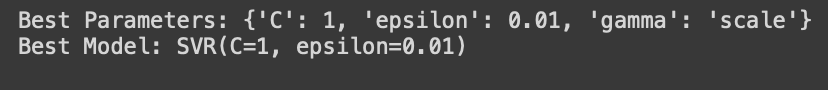

In [ ]:
# train and test error for best svr model in dataframe with column 1: erro type, column 2: train error, column 3: test error
best_svr.fit(X_train_combined, y_train)
y_train_pred = best_svr.predict(X_train_combined)
y_test_pred = best_svr.predict(X_test_combined)

mse_train, mae_train, rmse_train, r2_train = mean_squared_error(y_train, y_train_pred), mean_absolute_error(y_train, y_train_pred), mean_squared_error(y_train, y_train_pred, squared=False), r2_score(y_train, y_train_pred)
mse_test, mae_test, rmse_test, r2_test = mean_squared_error(y_test, y_test_pred), mean_absolute_error(y_test, y_test_pred), mean_squared_error(y_test, y_test_pred, squared=False), r2_score(y_test, y_test_pred)

train_test_error = pd.DataFrame({'Error Type': ['MSE', 'MAE', 'RMSE', 'R2'], 'Train Error': [mse_train, mae_train, rmse_train, r2_train], 'Test Error': [mse_test, mae_test, rmse_test, r2_test]})
display(train_test_error)

,Error Type,Train Error,Test Error
0,MSE,0.010199,0.026384
1,MAE,0.055554,0.118927
2,RMSE,0.100989,0.162430
3,R2,0.865538,0.665669


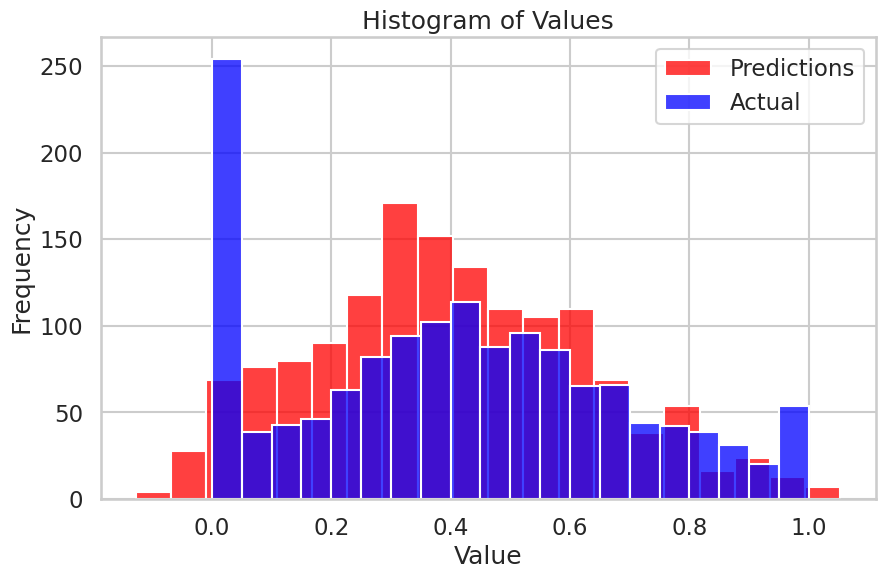

In [ ]:
# fit predict the test set on best svr and print histogram with predictions vs y_test
best_svr.fit(X_train_combined, y_train)
y_pred = best_svr.predict(X_test_combined)

sns.histplot(y_pred, bins=20, kde=False, color='red', label='Predictions')
sns.histplot(y_test, bins=20, kde=False, color='blue', label='Actual')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.legend()
plt.show()

We can see that our model predicts outside of the bounds of the truncated data. Therefore, we will apply boundaries which should improve predictions across the end. Our model has no bounded output.

In [ ]:
# truncate data at 0 and 1
y_pred_truncated = np.clip(y_pred, 0, 1)

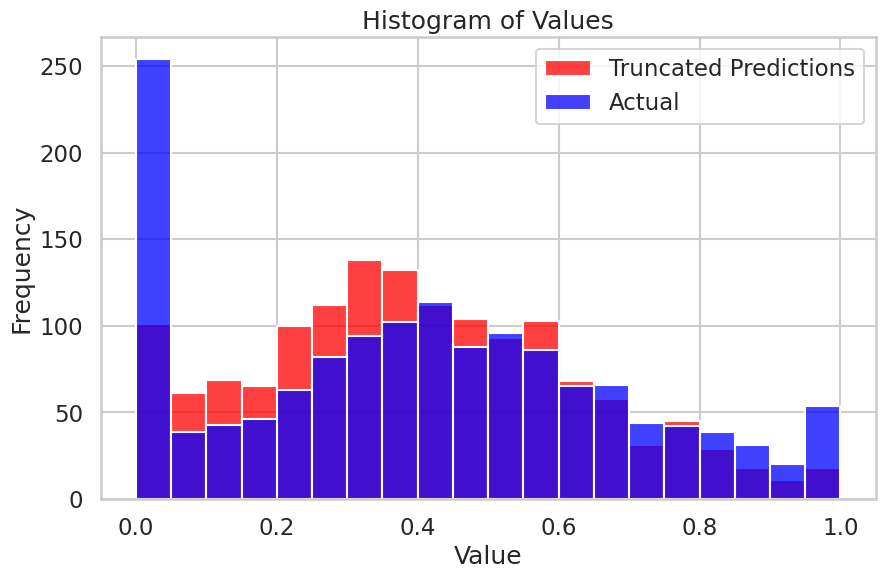

In [ ]:
sns.histplot(y_pred_truncated, bins=20, kde=False, color='red', label='Truncated Predictions')
sns.histplot(y_test, bins=20, kde=False, color='blue', label='Actual')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.legend()
plt.show()

## Feature Scaling over SVR

Checking if applying different scalers can have a significant impact on the performance of the model. We choose SVR as it is the model performing better and becasuse it is especially sensitive to the magnitude of the data. **Important** to note is that we apply the scalars on the PCs that we determined in the PCA

**Conclusion:** none of the scalers has a "positve" effect on the model performance.


In [ ]:
# Continuous and binary features
cont_features = [col for col in X_train_combined.columns if 'PC' in col]
binary_features = [col for col in X_train_combined.columns if 'FP' in col]

scalers = [StandardScaler(), MinMaxScaler(), RobustScaler(), Normalizer()]
pipeline_results = pd.DataFrame()

# Iterate through each scaler
for scaler in scalers:
    # Define preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('cont_scaler', scaler, cont_features),
            ('binary_pass', 'passthrough', binary_features)
        ]
    )

    # Create a new instance of the SVR model
    svr_model = best_svr

    # Set up the pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', svr_model)])

    # Evaluate the pipeline
    pipeline_results = evaluate_regression_kfold(pipeline,
                                                 X_train_combined,
                                                 y_train,
                                                 X_test_combined,
                                                 y_test,
                                                 label=f"SVR with {scaler.__class__.__name__}")

# Display the results
display(pipeline_results.sort_values('RMSE Test (Holdout)', ascending=True))

,Model,MSE Train (Avg KFold),MAE Train (Avg KFold),RMSE Train (Avg KFold),R2 Train (Avg KFold),MSE Validation (Avg KFold),MAE Validation (Avg KFold),RMSE Validation (Avg KFold),R2 Validation (Avg KFold),MSE Test (Holdout),MAE Test (Holdout),RMSE Test (Holdout),R2 Test (Holdout)
10,SVR with RobustScaler,0.005011,0.032855,0.070771,0.933945,0.026348,0.118225,0.162232,0.652099,0.025937,0.117620,0.161051,0.671323
8,SVR with StandardScaler,0.004757,0.031727,0.068959,0.937287,0.026370,0.118394,0.162295,0.651846,0.026046,0.117999,0.161389,0.669941
11,SVR with Normalizer,0.004600,0.030782,0.067806,0.939365,0.026362,0.118214,0.162257,0.652031,0.026063,0.117896,0.161440,0.669732
9,SVR with MinMaxScaler,0.004622,0.031053,0.067963,0.939081,0.026533,0.118790,0.162779,0.649798,0.026329,0.118740,0.162264,0.666355
7,SVR with Hyperparameter Tuning,0.009964,0.054186,0.099773,0.868627,0.027539,0.120761,0.165873,0.636262,0.026384,0.118927,0.162430,0.665669
5,Support Vector Machine,0.012584,0.089320,0.112158,0.834067,0.028497,0.127446,0.168760,0.623486,0.027700,0.127069,0.166434,0.648987
4,XGBoost,0.005554,0.055634,0.074522,0.926761,0.029831,0.128188,0.172680,0.605953,0.029034,0.128173,0.170393,0.632086
2,Random Forest,0.004605,0.049138,0.067859,0.939282,0.029224,0.125986,0.170829,0.614250,0.029555,0.129326,0.171917,0.625477
6,Multilayer Perceptron,0.002476,0.030963,0.049221,0.967310,0.037029,0.144688,0.192411,0.510499,0.037471,0.145802,0.193574,0.525170
0,Ridge Regression,0.032982,0.141569,0.181606,0.565121,0.038966,0.153336,0.197340,0.485560,0.039011,0.155680,0.197511,0.505661


Scaling the PCs improves model performance slightly BUT we still decide not to use it because it increases overfitting. We are fine with performing slightly worse to have a more generalizable model. Especially, because it will be applied to completely new data, generalizability is important. A ca. 0.001 improvement in RMSE and a ca. 1.5% increase in the R2 for us simply does not warrant the strong overfitting.
Generally, this project has shown that simply selecting the best test score is not the right approach and one needs to carefully balance Bias and Variance to avoid overfitting.

# Validation on X_ivs

##Data preparation

X_ivs needs to undergo the same preprocessing as the training data.

In [ ]:
# Reset the index of the DataFrame
X_ivs = df_X_final_test.reset_index(drop=True)

In [ ]:
# Get features
cont_features = [col for col in X_ivs.columns if 'D' in col]

X_ivs_cont = X_ivs[cont_features]
X_ivs_binary = X_ivs[binary_features]

###Scaling

In [ ]:
# Get the full, initially loaded train dataset
X_train_full = df_X.reset_index(drop=True)
y_train_full = y.reset_index(drop=True)

# Extract the continuous and binary features
X_train_full_cont = X_train_full[cont_features]
X_train_full_binary = X_train_full[binary_features]

In [ ]:
# re-train the scaler on the entire training set
final_scaler = StandardScaler()

# fit the scaler on the full training set
final_scaler.fit(X_train_full_cont)

# transform the training set
X_train_full_cont_scaled = pd.DataFrame(final_scaler.transform(X_train_full_cont), columns=cont_features)

# transform the test set
X_ivs_cont_scaled = pd.DataFrame(final_scaler.transform(X_ivs_cont), columns=cont_features)

### PCA

In [ ]:
# Apply pca to the training set
final_cont_pca = PCA(n_components=2)
final_cont_pca.fit(X_train_full_cont_scaled)

# Apply pca to the training set
X_train_full_cont_pca = final_cont_pca.transform(X_train_full_cont_scaled)

X_train_full_cont_pca = pd.DataFrame(X_train_full_cont_pca)
X_train_full_cont_pca.columns = ['PC' + str(i) for i in range(1, final_cont_pca.n_components_ + 1)]

# Apply pca to the test set
X_ivs_cont_pca = final_cont_pca.transform(X_ivs_cont_scaled)

X_ivs_cont_pca = pd.DataFrame(X_ivs_cont_pca)
X_ivs_cont_pca.columns = ['PC' + str(i) for i in range(1, final_cont_pca.n_components_ + 1)]

pd.DataFrame(X_ivs_cont_pca).head()

,PC1,PC2
0,-2.781790,-0.803837
1,-1.550648,0.644467
2,3.225622,-0.256003
3,0.882580,-2.339014
4,1.559062,0.696337


###Combine datasets

In [ ]:
# Train set
X_train_full_combined = pd.concat([pd.DataFrame(X_train_full_cont_pca), X_train_full_binary], axis=1)

# Test set
X_ivs_combined = pd.concat([pd.DataFrame(X_ivs_cont_pca), X_ivs_binary], axis=1)

In [ ]:
# Column names to string
X_train_full_combined.columns = X_train_full_combined.columns.astype(str)
X_ivs_combined.columns = X_ivs_combined.columns.astype(str)

In [ ]:
# Select final features
X_train_full_combined = X_train_full_combined[selected_features]
X_ivs_combined = X_ivs_combined[selected_features]

In [ ]:
X_ivs_combined

,FP1011,PC1,PC2,FP1242,FP1878,FP0916,FP1104,FP0518,FP1555,FP0810,...,FP0998,FP1455,FP1348,FP0868,FP0490,FP2022,FP1270,FP0804,FP0632,FP0759
0,0.0,-2.781790,-0.803837,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,-1.550648,0.644467,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,3.225622,-0.256003,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.882580,-2.339014,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.559062,0.696337,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,0.0,0.685977,0.962601,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
812,1.0,0.274814,-0.713497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
813,0.0,3.724441,0.339472,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
814,0.0,-3.592314,-1.548796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##Model Evaluation

In [ ]:
# re-train the model on the entire dataset
best_svr.fit(X_train_full_combined, y_train_full)

SVR(C=1, epsilon=0.01)

In [ ]:
y_ivs_pred = best_svr.predict(X_ivs_combined)

In [ ]:
print(y_ivs_pred[:30])

[ 0.19386916  0.55697596  0.32616727  0.36338255  0.00904981 -0.07330906
  0.43119404  0.7332652   0.14295361  0.67258509  0.5665668   0.53058916
  0.52731244  0.0762248   0.33342251  0.08173193  0.27439903  0.34942145
  0.3986376  -0.03377521  0.93880046  0.2078317   0.48032672  0.14178215
  0.08935258  0.27868311  0.21131648  0.27433359  0.13356531  0.16749925]


In [ ]:
svr_final_predictions = pd.DataFrame(y_ivs_pred, columns=["Predictions"])
print(svr_final_predictions)

     Predictions
0       0.193869
1       0.556976
2       0.326167
3       0.363383
4       0.009050
..           ...
811     0.297571
812     0.711307
813     0.087852
814     0.437792
815     0.564136

[816 rows x 1 columns]


In [ ]:
# truncate data at 0 and 1
svr_final_predictions.loc[svr_final_predictions["Predictions"] < 0, "Predictions"] = 0
svr_final_predictions.loc[svr_final_predictions["Predictions"] > 1, "Predictions"] = 1

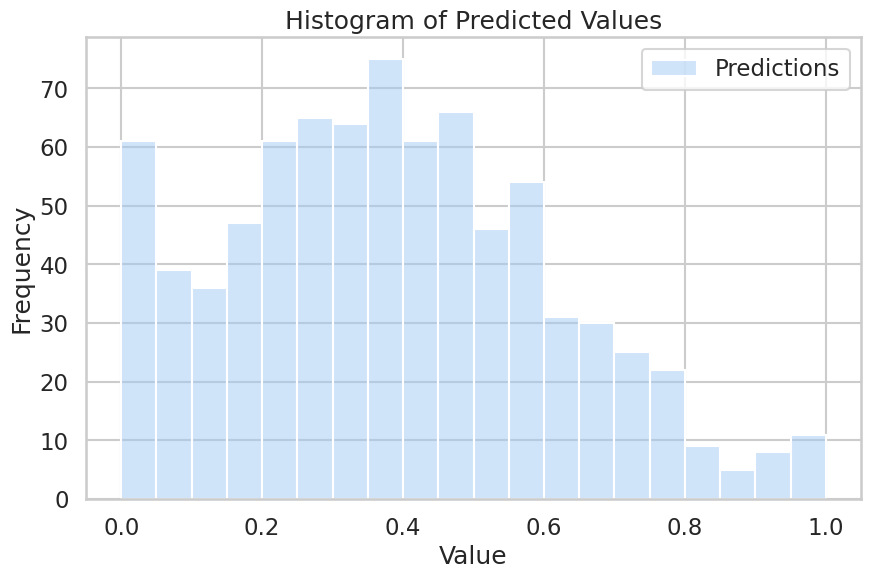

In [ ]:
sns.histplot(svr_final_predictions, bins=20, kde=False, color='red', label='Predictions')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Values')
plt.legend()
plt.show()

Saving Predictions

In [ ]:
from google.colab import files

In [ ]:
group_number = 15
file_name = f"{group_number:02d}.txt"

with open(file_name, 'w') as file:
    for pred in y_ivs_pred:
        file.write(f"{pred}\n")

In [ ]:
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>